# Binarized analyses of cross-species muscle

In [1]:
%load_ext autoreload
%autoreload 2

Matplotlib Backend: module://ipykernel.pylab.backend_inline
-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
matplotlib_venn     0.11.6
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             

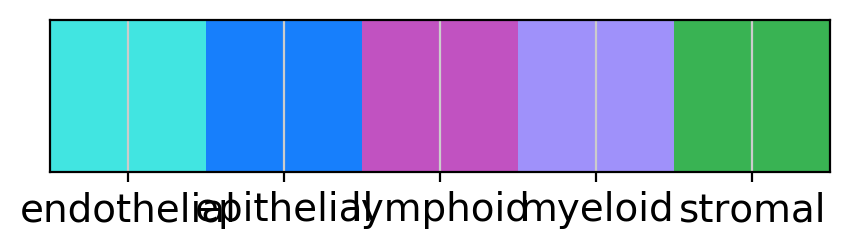

In [2]:
import itertools
import os

# Third-party modules
import matplotlib_venn

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy

# Olga's modules
import xspecies
import binarized
import enrich


outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

### Local utils to save figures

In [3]:
import sys

# sys.path.append()

sys.path.append(
    "/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies"
)

from plot_utils import save_figures

## Constants

In [4]:
groupby = "narrow_group"
species = "species"

tissue = "muscle"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "binarized")

# Load data

In [5]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-Lemur-mouse_10x__one2one_orthologs__{tissue}__april2021__preprocessed.h5ad",
#     f"concatenated__human-Lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 105 ms, sys: 44.8 ms, total: 150 ms
Wall time: 314 ms


AnnData object with n_obs × n_vars = 5777 × 12875
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'channel_10x', 'compartment', 'method', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'lemur_name', 'lemur_renamed', 'cell_id_lemur_renamed'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'name-lemur', 'highly_variable-lemur', 'n_cells-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_group_name_colors', 'den

In [6]:
! ls -lha $h5ad

-rw-r--r-- 1 olga czb 70M Jul 27 13:38 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__muscle__april2021__preprocessed.h5ad


# Within-narrow group, run stability analyses

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:33,973 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:33,975 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:33,978 INFO: Starting number of narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:33,999 INFO: After removing groups not in all species narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:34,019 INFO: After cell groups with too few cells in narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

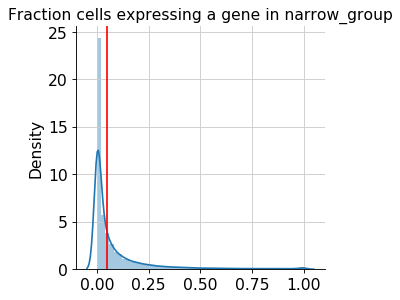

In [9]:
stability = binarized.BinarizedStabilityAnalyses(
    adata, groupby, species, debug=True, species_order=["Human", "Mouse Lemur", "Mouse"]
)


Binarizing at thresholds: [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37, 0.38, 0.39]: 100%|██████████| 39/39 [00:00<00:00, 2835.51it/s]
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:29:35,178 INFO: Computing pairwise mutual information across thresholds

Computing mutual information between thresholds: 0it [00:00, ?it/s][Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.

Computing mutual information between thresholds: 16it [00:00, 47.56it/s]
Computing mutual information between thresholds: 16it [00:12, 47.56it/s]
Computing mutual information between thresholds: 32it [00:15

(2555709, 4)


-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:27,875 INFO: Number of stable genes: 3449/12467 (27.67%)
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:27,889 INFO: Number of unstable genes: 9018/12467 (72.33%)


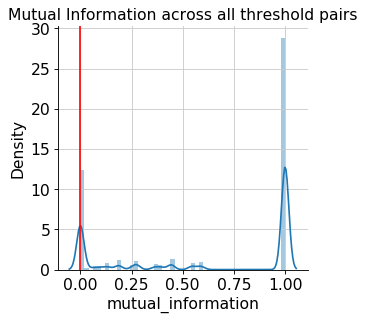

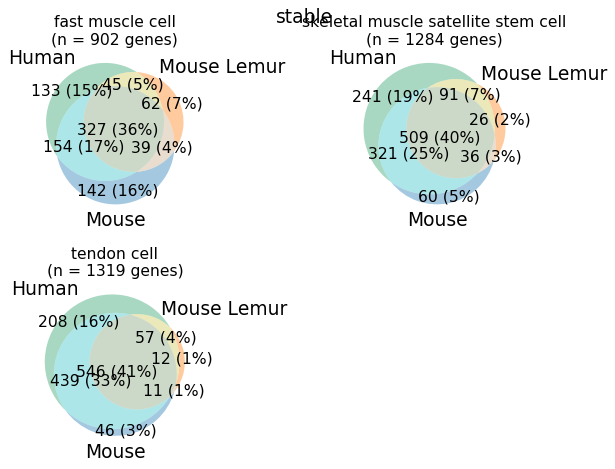

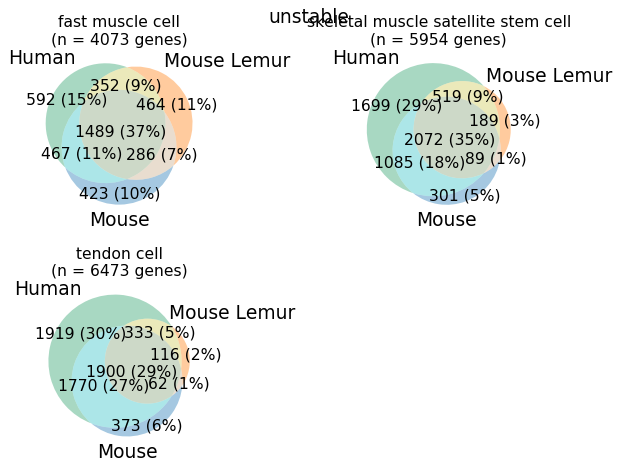

In [10]:
stability.do_stability_analysis(thresholds=np.arange(0.01, 0.4, 0.01))


Saving figures: 100%|██████████| 2/2 [00:10<00:00,  5.19s/it]


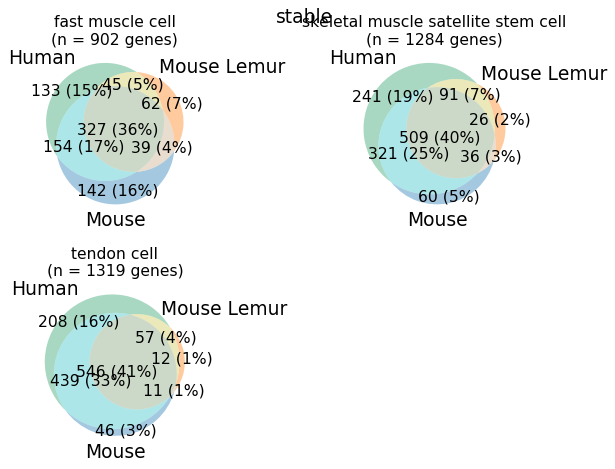

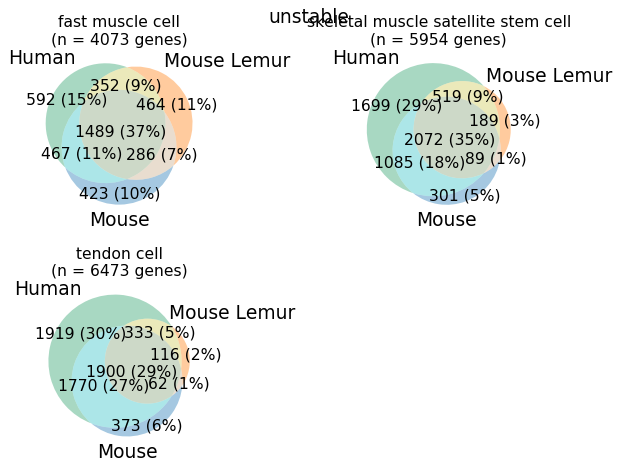

In [11]:
stability.plot_venns()
figure_folder = os.path.join(figure_folder_base, "stable-genes")

save_figures(figure_folder)

### Skip GO enrichment for now --> need to install `gprofiler-official`

In [12]:
# stability.do_go_enrichment(plot=True, write=True)

## Plot enrichment, groupby enrichment database source

In [13]:
# stability.plot_go_enrichment(groupby_source=True)

# Do primate enrichment

In [14]:
species

'species'

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:41,084 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:41,085 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:41,088 INFO: Starting number of narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:41,112 INFO: After removing groups not in all species narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-07-27 19:40:41,131 INFO: After cell groups with too few cells in narrow_group: 3
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

CPU times: user 12.9 s, sys: 12.9 s, total: 25.8 s
Wall time: 1min 29s


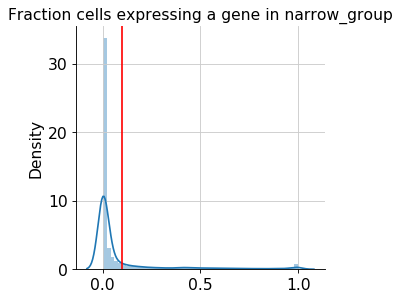

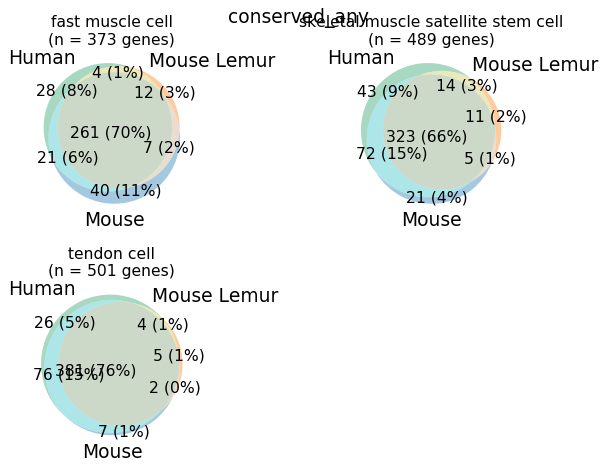

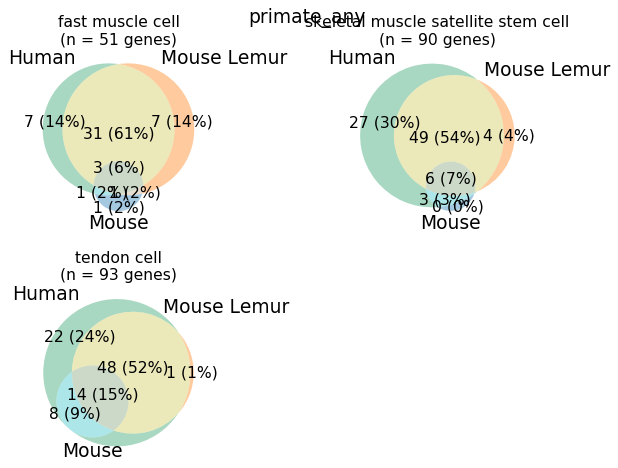

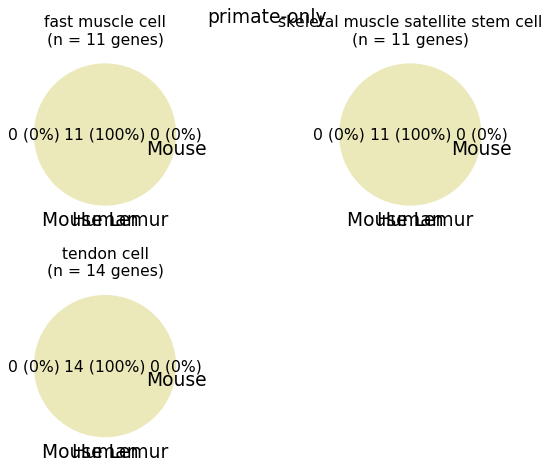

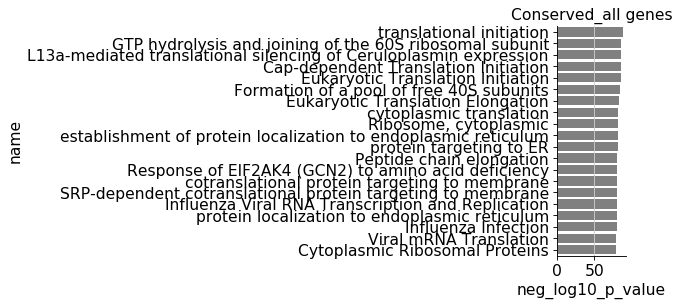

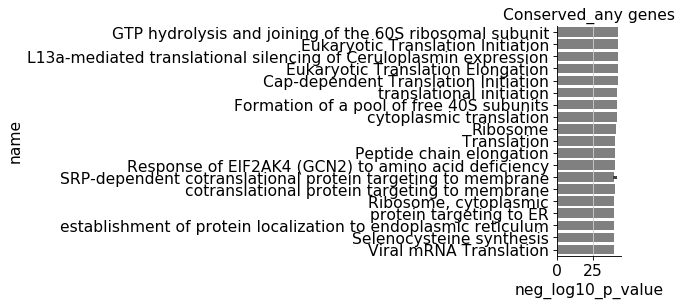

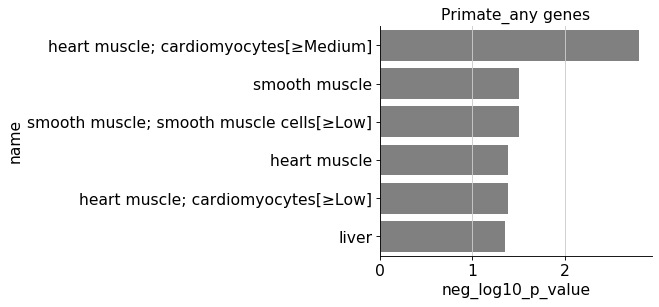

In [15]:
%%time

import binarized

primate = binarized.BinarizedPrimateAnalyses(
    adata,
    groupby,
    species,
    stable_genes=stability.stable_gene_names,
    debug=True,
    primates=["Human", "Mouse Lemur"],
    species_order=["Human", "Mouse Lemur", "Mouse"],
)
primate.find_primate_enriched_genes()

figure_folder = os.path.join(FIGURE_FOLDER, tissue, "primate")

save_figures(figure_folder)

## Get p value of overlap of binary groups

In [16]:
lines = []

for celltype, df in primate.binarized.groupby(level=1):
    #     print(df.head())
    for species1, species2 in itertools.combinations(primate.species_order, 2):
        pvalue = - binarized.overlap_pvalue_sf(
            df.loc[(species1, celltype)], df.loc[(species2, celltype)], log=True
        )

        species_pair = primate.separator.join([species1, species2])
        line = [celltype, species1, species2, species_pair, pvalue]
        lines.append(line)

pvalue_df = pd.DataFrame(
    lines, columns=["celltype", "species1", "species2", "species_pair", "log_pvalue"]
)
pvalue_df["log_pvalue_adjusted"] = pvalue_df["log_pvalue"] + np.log(len(pvalue_df))

pvalue_df

,celltype,species1,species2,species_pair,log_pvalue,log_pvalue_adjusted
0,fast muscle cell,Human,Mouse Lemur,Human--Mouse Lemur,544.066988,546.264212
1,fast muscle cell,Human,Mouse,Human--Mouse,612.275104,614.472329
2,fast muscle cell,Mouse Lemur,Mouse,Mouse Lemur--Mouse,499.340631,501.537856
3,skeletal muscle satellite stem cell,Human,Mouse Lemur,Human--Mouse Lemur,415.516767,417.713992
4,skeletal muscle satellite stem cell,Human,Mouse,Human--Mouse,764.234950,766.432174
5,skeletal muscle satellite stem cell,Mouse Lemur,Mouse,Mouse Lemur--Mouse,436.793318,438.990542
6,tendon cell,Human,Mouse Lemur,Human--Mouse Lemur,508.657435,510.854659
7,tendon cell,Human,Mouse,Human--Mouse,982.803462,985.000686
8,tendon cell,Mouse Lemur,Mouse,Mouse Lemur--Mouse,487.790429,489.987654


## Find cell types where the human-Lemur overlap is larger than human-mouse

In [17]:
pvalue_df_species_pair_index = pvalue_df.set_index("species_pair")
pvalue_df_species_pair_index.head()

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse Lemur,fast muscle cell,Human,Mouse Lemur,544.066988,546.264212
Human--Mouse,fast muscle cell,Human,Mouse,612.275104,614.472329
Mouse Lemur--Mouse,fast muscle cell,Mouse Lemur,Mouse,499.340631,501.537856
Human--Mouse Lemur,skeletal muscle satellite stem cell,Human,Mouse Lemur,415.516767,417.713992
Human--Mouse,skeletal muscle satellite stem cell,Human,Mouse,764.234950,766.432174


In [18]:
is_primate_enriched_celltypes = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse Lemur", "log_pvalue_adjusted"]
    < x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
is_primate_enriched_celltypes

celltype
fast muscle cell                       True
skeletal muscle satellite stem cell    True
tendon cell                            True
dtype: bool

In [19]:
primate_enriched_celltypes = is_primate_enriched_celltypes[
    is_primate_enriched_celltypes
].index

In [20]:
skeletal_muscle = primate.primate_any[primate_enriched_celltypes]
skeletal_muscle[skeletal_muscle == primate.primates_string]

narrow_group,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,NaN,NaN,Human--Mouse Lemur
ABLIM2,Human--Mouse Lemur,NaN,NaN
ACYP1,NaN,NaN,Human--Mouse Lemur
ALDH9A1,Human--Mouse Lemur,NaN,NaN
AMD1,NaN,Human--Mouse Lemur,Human--Mouse Lemur
...,...,...,...
ZC3HAV1,NaN,NaN,Human--Mouse Lemur
ZDHHC14,NaN,NaN,Human--Mouse Lemur
ZNF146,NaN,Human--Mouse Lemur,NaN
ZNF704,NaN,Human--Mouse Lemur,Human--Mouse Lemur


## Find cell types where the human-Lemur overlap is larger than human-mouse

In [21]:
pvalue_df_species_pair_index = pvalue_df.set_index("species_pair")
pvalue_df_species_pair_index.head()

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse Lemur,fast muscle cell,Human,Mouse Lemur,544.066988,546.264212
Human--Mouse,fast muscle cell,Human,Mouse,612.275104,614.472329
Mouse Lemur--Mouse,fast muscle cell,Mouse Lemur,Mouse,499.340631,501.537856
Human--Mouse Lemur,skeletal muscle satellite stem cell,Human,Mouse Lemur,415.516767,417.713992
Human--Mouse,skeletal muscle satellite stem cell,Human,Mouse,764.234950,766.432174


In [22]:
pvalue_df_species_pair_index

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse Lemur,fast muscle cell,Human,Mouse Lemur,544.066988,546.264212
Human--Mouse,fast muscle cell,Human,Mouse,612.275104,614.472329
Mouse Lemur--Mouse,fast muscle cell,Mouse Lemur,Mouse,499.340631,501.537856
Human--Mouse Lemur,skeletal muscle satellite stem cell,Human,Mouse Lemur,415.516767,417.713992
Human--Mouse,skeletal muscle satellite stem cell,Human,Mouse,764.234950,766.432174
Mouse Lemur--Mouse,skeletal muscle satellite stem cell,Mouse Lemur,Mouse,436.793318,438.990542
Human--Mouse Lemur,tendon cell,Human,Mouse Lemur,508.657435,510.854659
Human--Mouse,tendon cell,Human,Mouse,982.803462,985.000686
Mouse Lemur--Mouse,tendon cell,Mouse Lemur,Mouse,487.790429,489.987654


## Plot difference in p-value of overlap between binarized genes in cell types

In [23]:
pvalue_diff = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse Lemur", "log_pvalue_adjusted"]
    - x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
pvalue_diff = pvalue_diff.reset_index()
pvalue_diff = pvalue_diff.rename(columns={0: "diff_log_pvalue"})
pvalue_diff = pvalue_diff.sort_values("diff_log_pvalue", ascending=False)
pvalue_diff.head()

narrow_to_compartment = adata.obs[["narrow_group", "compartment_group"]].set_index(
    "narrow_group"
)
narrow_to_compartment = narrow_to_compartment.loc[
    ~narrow_to_compartment.index.duplicated(), "compartment_group"
]
narrow_to_compartment

pvalue_diff["compartment"] = pvalue_diff.celltype.map(narrow_to_compartment)
pvalue_diff.head()

colors = {
    x: xspecies.compartment_to_color[y]
    for i, (x, y) in pvalue_diff[["celltype", "compartment"]].iterrows()
}


sns.set(context="paper", style="whitegrid")

g = sns.catplot(
    data=pvalue_diff, y="celltype", x="diff_log_pvalue", kind="bar", palette=colors,
    height=2.5, aspect=2,
)
g.set(xlabel="log10pval(Human, Lemur) - log10pval(Human, Mouse)")
pdf = os.path.join(
    figure_folder_base,
    f"binarized__{tissue}__pvalue_diff_overlap__human-Lemur_vs_human-mouse.pdf",
)
g.set(
    title=(
        r"Human-Mouse higher overlap in binarized genes $\leftarrow$"
        r" $\rightarrow$ Human-Lemur higher overlap in binarized genes"
    )
)
g.savefig(pdf)

AttributeError: module 'xspecies' has no attribute 'compartment_to_color'

In [ ]:
is_primate_enriched_celltypes = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse Lemur", "log_pvalue_adjusted"]
    < x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
is_primate_enriched_celltypes

In [ ]:
primate_enriched_celltypes = is_primate_enriched_celltypes[
    is_primate_enriched_celltypes
].index
print('\n'.join(is_primate_enriched_celltypes[primate_enriched_celltypes].index))

## Make table of primate enriched genes

In [ ]:
primate_enriched_celltypes

In [ ]:
genes_in_primate_enriched_celltypes = primate.primate_any[primate_enriched_celltypes]
genes_in_primate_enriched_celltypes = genes_in_primate_enriched_celltypes[
    genes_in_primate_enriched_celltypes == primate.primates_string
]
genes_in_primate_enriched_celltypes = genes_in_primate_enriched_celltypes.dropna(
    how="all"
)

df_components = {}

for celltype, col in genes_in_primate_enriched_celltypes.iteritems():
    print(f"--- {celltype} ---")
    celltype_primate_genes = col[col == primate.primates_string].dropna(how="all")
    df_components[celltype] = sorted(celltype_primate_genes.index.tolist())

max_n_genes = max(len(v) for v in df_components.values())
df_components = {
    k: v + [None] * (max_n_genes - len(v)) for k, v in df_components.items()
}
primate_enriched_genes_per_celltype = pd.DataFrame(df_components)
primate_enriched_genes_per_celltype

In [ ]:
genes_in_primate_enriched_celltypes

In [ ]:
genes_in_primate_enriched_celltypes

#### Write primate-specific gene enrichement to file

In [ ]:
xlsx = os.path.join(
    figure_folder_base, "genes_in_primate_enriched_celltypes.xlsx"
)
primate_enriched_genes_per_celltype.to_excel(xlsx)

In [ ]:
genes_in_primate_enriched_celltypes

In [ ]:
genes_in_primate_enriched_celltypes_binary = genes_in_primate_enriched_celltypes.fillna(
    False
).replace(primate.primates_string, True)
genes_in_primate_enriched_celltypes_binary

## Make dotplots of binary-enriched genes

In [ ]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

## Plot Muscle Disease gene lists

In [ ]:
dystrophin_dystroglycan_complex = """LAMA2
SGCA
SGCB
SGCD
SGCE
DAG1
ACTA2
DMD
NOS1
SNTA1
SNTB2
DTNA
DTNB
DTNBP1"""

polyamine_biosynthesis = """OAZ1
SAT1
OAZ2
AZIN1
SRM
PAO
SMOX
SMS
AMD1
ODC
AMD1
AGMAT
AZIN
OAT
ADC
ARG"""

redox_flux = """GPX3
PRDX1
PDIA3
PDIA6
GLRX3
CYBA
TXNDC5
TXNDC9
TXNRD1
TXNL4A
GPX1
PRDX5
SOD1"""

u1_snrp = """RNU1
SNRNP70
SNRPA
SNRPC
SNRPB1
SNRPD1
SNRPD2
SNRPD3
SNRPE
SNRPF
SNRPG"""

u2_snrp = """RNU2
SNRPA1
SNRPB2
SF3A1
SF3A2
SF3A3
SF3B1
SF3B2
SF3B3
SNRPB1
SNRPD1
SNRPD2
SNRPD3
SNRPE
SNRPF
SNRPG"""

notch = """NOTCH1
NOTCH2
NOTCH3
RBPJ
HES1
HES5
HEY1
HEY2
HEYL
DLL1
DLL2
DLL3
DLL4
JAG1
JAG2"""


ehlers_danlos = """ADAMTS2
B3GALT6
B4GALT7
C1R
C1S
CHST14
COL1A1
COL1A2
COL3A1
COL5A1
DSE
FKBP14
PLOD1
TNXB
FBN1"""

gene_strings = dict(
    dystrophin_dystroglycan_complex=dystrophin_dystroglycan_complex,
    polyamine_biosynthesis=polyamine_biosynthesis,
    redox_flux=redox_flux,
    u1_snrp=u1_snrp,
    u2_snrp=u2_snrp,
    notch=notch,
    ehlers_danlos=ehlers_danlos,
)
gene_lists = {k: v.split() for k, v in gene_strings.items()}
# gene_lists

In [ ]:
cross_species.make_subset_adatas(do_pca_umap=False)

In [ ]:

for gene_group_name, gene_names in gene_lists.items():
    print(gene_group_name)
    cross_species.dotplots(gene_names)

## Plot binarized groups

In [ ]:
for col_name, col_values in genes_in_primate_enriched_celltypes_binary.iteritems():
    gene_names = col_values[col_values].index
    col_name_sanitized = xspecies.sanitize(col_name)
    cross_species.dotplots(
        gene_names,
        save=f"__binary__{col_name_sanitized}",
        select_group=col_name,
        save_format="pdf",
        max_genes=32,
    )

### Venn diagrams of conserved vs primate

In [ ]:
set_list = [set(primate.primate_any.index), set(primate.conserved_any.index)]
labels = ["primate_any", "conserved_any"]

matplotlib_venn.venn2(set_list, set_labels=labels)

In [ ]:
has_mouse = primate.species_sharing_2d.applymap(
    lambda x: "mouse" in x if isinstance(x, str) else x
)
rows = has_mouse.any(axis=1)
mouse_any = primate.species_sharing_2d.loc[rows]
print(mouse_any.shape)
mouse_any.head()

In [ ]:
set_list = [
    set(primate.primate_any.index),
    set(primate.conserved_any.index),
    set(mouse_any.index),
]
labels = ["primate_any", "conserved_any", "mouse_any"]

matplotlib_venn.venn3(set_list, set_labels=labels)

In [ ]:
len(primate.primate_any.index.intersection(primate.primate_all.index))

In [ ]:
len(primate.primate_any.index.intersection(primate.conserved_any.index))

In [ ]:
# compartment_primate.dotplot("HHIP")

In [ ]:
rows = (
    (primate.species_sharing_2d == "human-Lemur") | primate.species_sharing_2d.isnull()
).all(axis=1)
df = primate.species_sharing_2d.loc[rows]
df = df.dropna(how="all")
df

### Plot all-conserved or all-primate, groupby source

In [ ]:
## this is empty, skip
# primate.do_go_enrichment(groupby_source=True, write=True)

### Do per-compartment enrichment, overall

In [ ]:
# primate.do_per_group_enrichment()

### Do per-compartment enrichment, per-source

In [ ]:
primate.do_per_group_enrichment(groupby_source=True, write=True)

figure_folder = os.path.join(figure_folder_base, "primate-gprofiler-enrichment")

save_figures(figure_folder)

# End of notebook